In [1]:
import pandas as pd
import numpy as np
import pickle
from pathlib import Path

In [2]:
dPath = Path("../docs/dumps")

In [3]:
with open(dPath / "train_data.pkl", 'rb') as filename:
    train_data = pickle.load(filename)

with open(dPath / "valid_data.pkl", 'rb') as filename:
    valid_data = pickle.load(filename)

In [4]:
with open(dPath / "rf_exp_03_names.pkl", 'rb') as filename:
    names = pickle.load(filename)

In [47]:
all_df = pd.concat([train_data,valid_data], ignore_index=True, axis=0)

In [48]:
all_df.Detected

0           True
1           True
2           True
3           True
4           True
           ...  
1078855     True
1078856     True
1078857    False
1078858    False
1078859     True
Name: Detected, Length: 1078860, dtype: bool

In [49]:
all_df = all_df[list(names) + ["Detected"]]

In [52]:
all_df.head()

,numExecuted,MutatorClass,numAssertInTC,numTestCover,numAssertInTM,ppavcc,cchalsteadCumulativeBugs,cchalsteadCumulativeVolume,ppRVF,ppnumberOfMethods,...,ccmaintainabilityIndexNC,mmhalsteadVocabulary,pptcc,mmexternalMethodsCalled,ppinstability,ppmaxcc,mmhalsteadEffort,mmvariablesReferenced,ccunweightedClassSize,Detected
0,14,2,14,1,7,2.125,0.593518,1780.554266,13.0,16.0,...,99.687474,21.0,34.0,1.0,0.666667,5.0,2782.972319,3.0,4.0,True
1,14,6,14,1,7,2.125,0.593518,1780.554266,13.0,16.0,...,99.687474,21.0,34.0,1.0,0.666667,5.0,2782.972319,3.0,4.0,True
2,14,6,14,1,7,2.125,0.593518,1780.554266,13.0,16.0,...,99.687474,21.0,34.0,1.0,0.666667,5.0,2782.972319,3.0,4.0,True
3,14,0,14,1,7,2.125,0.593518,1780.554266,13.0,16.0,...,99.687474,21.0,34.0,1.0,0.666667,5.0,2782.972319,3.0,4.0,True
4,14,0,14,1,7,2.125,0.593518,1780.554266,13.0,16.0,...,99.687474,21.0,34.0,1.0,0.666667,5.0,2782.972319,3.0,4.0,True


In [53]:
all_df.MutatorClass.value_counts(normalize=True) * 100

0     25.308659
1     19.103313
2     11.775949
3      9.575385
4      7.140686
5      4.231040
6      4.226962
7      3.989952
8      3.959828
9      3.235730
10     3.137200
11     1.880503
12     0.916986
13     0.863968
14     0.502938
15     0.117068
16     0.033832
Name: MutatorClass, dtype: float64

In [37]:
np.histogram(np.log(all_df.numExecuted))

(array([352182, 328372, 183821, 104203,  54778,  28906,  15203,   7506,
          3093,    796], dtype=int64),
 array([ 0.        ,  2.16669198,  4.33338395,  6.50007593,  8.6667679 ,
        10.83345988, 13.00015185, 15.16684383, 17.3335358 , 19.50022778,
        21.66691976]))

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

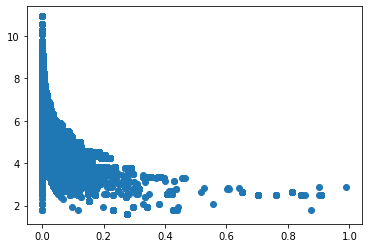

In [104]:
plt.plot(np.log(all_df.numExecuted)/all_df.ppnumberOfStatements, np.log(all_df.ppnumberOfStatements),"o");

In [54]:
all_df.describe().T

,count,mean,std,min,25%,50%,75%,max
numExecuted,1078860.0,8.216312e+05,2.172837e+07,1.000000,6.000000,27.000000,296.000000,2.569352e+09
MutatorClass,1078860.0,3.188224e+00,3.423496e+00,0.000000,0.000000,2.000000,5.000000,1.600000e+01
numAssertInTC,1078860.0,1.848095e+06,2.835709e+07,0.000000,14.000000,74.000000,594.000000,5.033895e+08
numTestCover,1078860.0,2.257315e+01,9.523730e+01,1.000000,1.000000,3.000000,12.000000,9.835000e+03
numAssertInTM,1078860.0,1.448557e+06,2.559281e+07,0.000000,4.000000,22.000000,175.000000,5.033895e+08
ppavcc,1078860.0,2.623049e+00,4.245570e+00,1.000000,1.482622,1.733333,2.466667,3.887097e+01
cchalsteadCumulativeBugs,1078860.0,5.703228e+00,1.219643e+01,0.005333,0.628799,1.640430,4.953406,8.867714e+01
cchalsteadCumulativeVolume,1078860.0,1.710968e+04,3.658928e+04,16.000000,1886.396872,4921.289148,14860.217638,2.660314e+05
ppRVF,1078860.0,3.589010e+01,3.661917e+01,0.000000,12.000000,17.000000,39.000000,1.210000e+02
ppnumberOfMethods,1078860.0,7.999197e+02,1.488291e+03,1.000000,73.000000,181.000000,602.000000,6.301000e+03


In [62]:
import seaborn as sns

In [70]:
copy_data = all_df.copy()

In [71]:
copy_data['numExecuted'] = np.log(copy_data.numExecuted)

In [88]:
copy_data['numTestCover'] = np.log(copy_data.numTestCover)

In [94]:
copy_data['numAssertInTC'] = np.log(all_df.numAssertInTC + 1) 

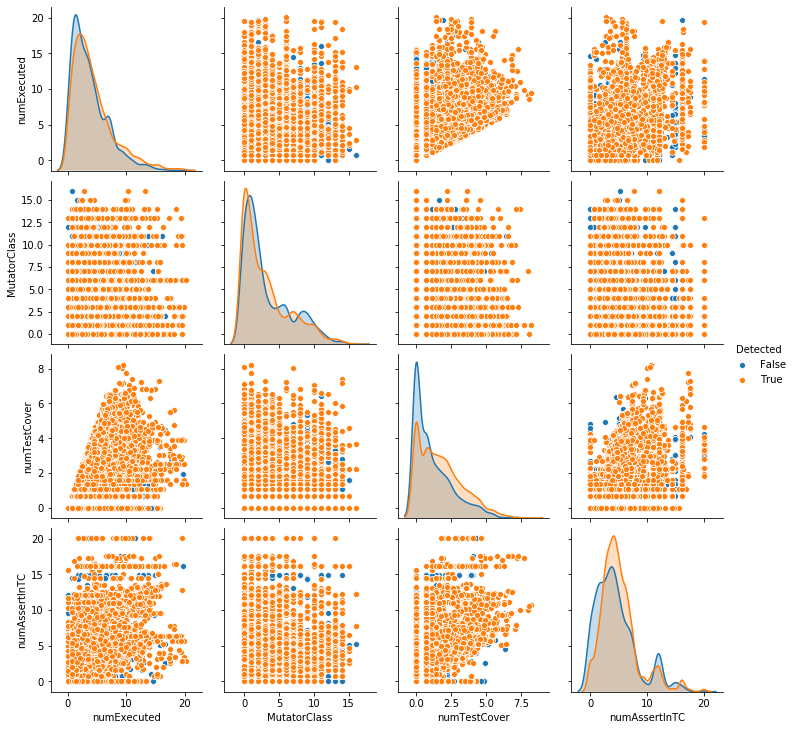

In [95]:
sns.pairplot(copy_data[['numExecuted','MutatorClass','numTestCover','numAssertInTC','Detected']].sample(10000), hue="Detected")

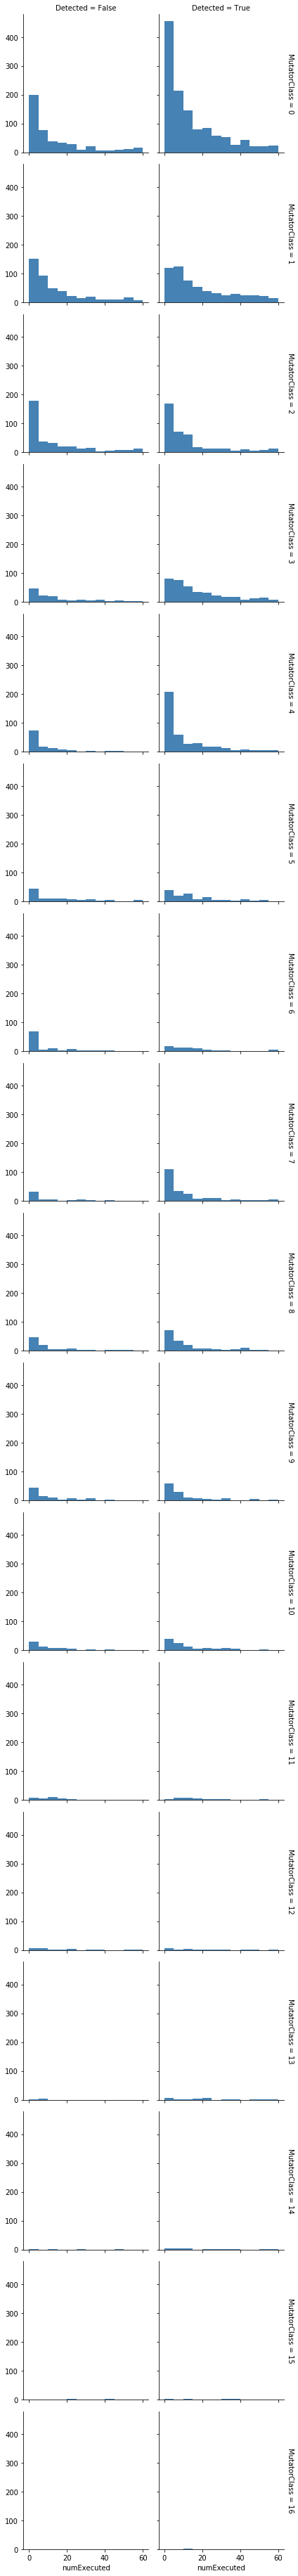

In [84]:
g = sns.FacetGrid(all_df.sample(10000), row="MutatorClass", col="Detected", margin_titles=True)
bins = np.linspace(0, 60, 13)
g.map(plt.hist, "numExecuted", color="steelblue", bins=bins)

In [5]:
with open(dPath / "test_data.pkl", 'rb') as filename:
    test_data = pickle.load(filename)

In [6]:
test_data.Detected.value_counts()

True     37843
False    20633
Name: Detected, dtype: int64

In [7]:
X_train = train_data.drop("Detected", axis=1)

In [8]:
import scipy.stats

In [9]:
X_train = X_train[names]

In [26]:
corr = np.round(scipy.stats.spearmanr(X_train).correlation,1)

In [27]:
X_train

,numExecuted,MutatorClass,numAssertInTC,numTestCover,numAssertInTM,ppavcc,cchalsteadCumulativeBugs,ppRVF,ppnumberOfMethods,ppnumberOfClasses,...,returnType,ccfanIn,ppfanin,pploc,ccmaintainabilityIndexNC,mmexternalMethodsCalled,ppinstability,ppmaxcc,mmvariablesReferenced,ccunweightedClassSize
0,14,2,14,1,7,2.125000,0.593518,13.0,16.0,5.0,...,3,1.0,1.0,262.0,99.687474,1.0,0.666667,5.0,3.0,4.0
1,14,6,14,1,7,2.125000,0.593518,13.0,16.0,5.0,...,3,1.0,1.0,262.0,99.687474,1.0,0.666667,5.0,3.0,4.0
2,14,6,14,1,7,2.125000,0.593518,13.0,16.0,5.0,...,3,1.0,1.0,262.0,99.687474,1.0,0.666667,5.0,3.0,4.0
3,14,0,14,1,7,2.125000,0.593518,13.0,16.0,5.0,...,3,1.0,1.0,262.0,99.687474,1.0,0.666667,5.0,3.0,4.0
4,14,0,14,1,7,2.125000,0.593518,13.0,16.0,5.0,...,3,1.0,1.0,262.0,99.687474,1.0,0.666667,5.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011359,7,0,63,1,4,1.216667,0.336378,9.0,300.0,43.0,...,4,0.0,13.0,2324.0,125.892626,1.0,0.071429,10.0,1.0,24.0
1011360,7,4,63,1,4,1.216667,0.336378,9.0,300.0,43.0,...,4,0.0,13.0,2324.0,125.892626,1.0,0.071429,10.0,1.0,24.0
1011361,71,4,63,6,29,1.216667,0.336378,9.0,300.0,43.0,...,2,0.0,13.0,2324.0,125.892626,0.0,0.071429,10.0,1.0,24.0
1011362,35,4,63,1,7,1.216667,0.336378,9.0,300.0,43.0,...,2,0.0,13.0,2324.0,125.892626,0.0,0.071429,10.0,1.0,24.0


In [28]:
mask = np.zeros_like(corr)

In [29]:
mask[np.triu_indices_from(mask)] = True

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

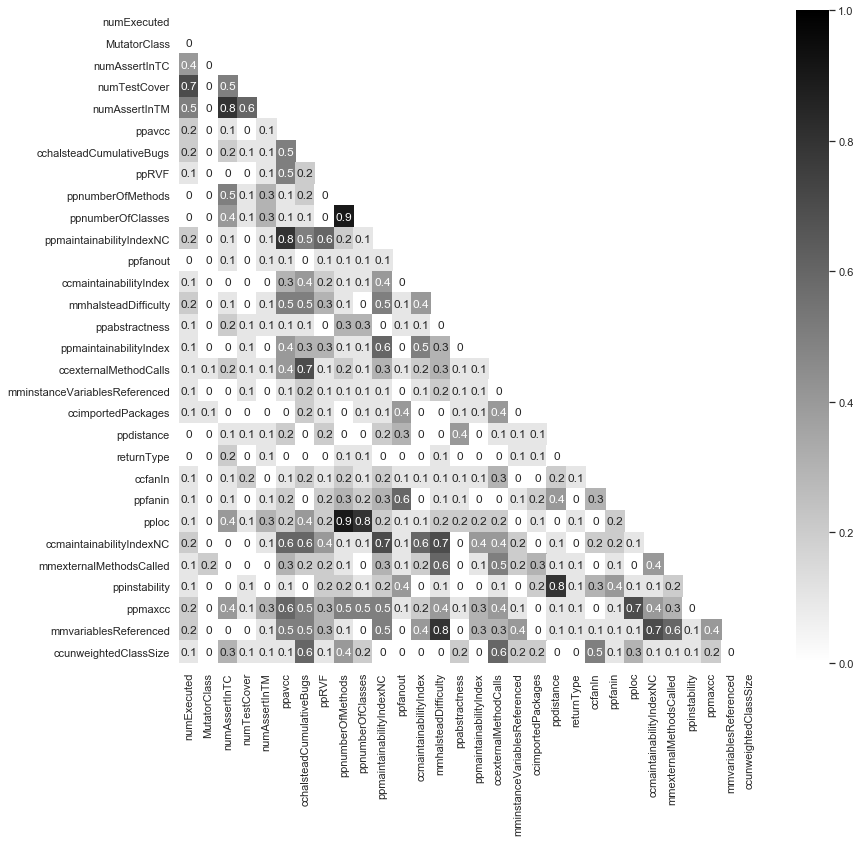

In [73]:
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(13, 12))
    ax = sns.heatmap(np.abs(corr), mask=mask, square=False, annot=True, xticklabels=names, yticklabels=names, cmap="gray_r")
    f.savefig("rcorr.pdf", bbox_inches='tight')

## Analysis of covered and uncovered files

In [9]:
from pathlib import Path
import pandas as pd
import numpy as np

In [3]:
dPath = Path("../docs/Data")

In [7]:
all_files = []
for file in dPath.iterdir():
    all_files.append(file)

In [10]:
li = []
for file in all_files:
    df = pd.read_csv(file)
    df = df.replace('?',np.NaN)
    df[df.columns[3:]] = df[df.columns[3:]].apply(pd.to_numeric)
    df.dropna(inplace=True)
    li.append(df)

C:\Users\Alireza\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Alireza\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\Alireza\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93

In [11]:
all_raw_df = pd.concat(li, ignore_index=True,axis=0)

In [14]:
all_df = all_raw_df[all_raw_df.numExecuted > 0].copy()

In [17]:
all_raw_df[all_raw_df.numExecuted == 0]

,Detected,MutatorClass,returnType,numExecuted,numTestCover,numAssertInTM,numAssertInTC,ppnumberOfClasses,ppnumberOfStatements,ppavcc,...,mmhalsteadVolume,mmnumberOfOperands,mminstanceVariablesReferenced,mmlocalInstanceVariablesReferenced,mmnumberOfVariableReferences,mmvariablesReferenced,mmnumberOfOperators,mmmaxDepthOfNesting,mmnumberOfExpressions,mmnumberOfLoops
54,False,ConstructorCallMutator,OTHERTYPE,0,0,0,0,4.0,112.0,1.625000,...,962.426852,83.0,0.0,0.0,23.0,7.0,82.0,1.0,35.0,0.0
67,False,NonVoidMethodCallMutator,OTHERTYPE,0,0,0,0,4.0,112.0,1.625000,...,962.426852,83.0,0.0,0.0,23.0,7.0,82.0,1.0,35.0,0.0
68,False,NonVoidMethodCallMutator,OTHERTYPE,0,0,0,0,4.0,112.0,1.625000,...,962.426852,83.0,0.0,0.0,23.0,7.0,82.0,1.0,35.0,0.0
69,False,NonVoidMethodCallMutator,OTHERTYPE,0,0,0,0,4.0,112.0,1.625000,...,962.426852,83.0,0.0,0.0,23.0,7.0,82.0,1.0,35.0,0.0
79,False,VoidMethodCallMutator,OTHERTYPE,0,0,0,0,4.0,112.0,1.625000,...,962.426852,83.0,0.0,0.0,23.0,7.0,82.0,1.0,35.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3032312,False,ConstructorCallMutator,V,0,0,0,0,6.0,557.0,2.865672,...,48.432043,7.0,0.0,0.0,1.0,1.0,7.0,0.0,3.0,0.0
3032313,False,NonVoidMethodCallMutator,V,0,0,0,0,6.0,557.0,2.865672,...,48.432043,7.0,0.0,0.0,1.0,1.0,7.0,0.0,3.0,0.0
3032314,False,NonVoidMethodCallMutator,V,0,0,0,0,6.0,557.0,2.865672,...,48.432043,7.0,0.0,0.0,1.0,1.0,7.0,0.0,3.0,0.0
3032315,False,NonVoidMethodCallMutator,V,0,0,0,0,6.0,557.0,2.865672,...,48.432043,7.0,0.0,0.0,1.0,1.0,7.0,0.0,3.0,0.0


In [18]:
all_df

,Detected,MutatorClass,returnType,numExecuted,numTestCover,numAssertInTM,numAssertInTC,ppnumberOfClasses,ppnumberOfStatements,ppavcc,...,mmhalsteadVolume,mmnumberOfOperands,mminstanceVariablesReferenced,mmlocalInstanceVariablesReferenced,mmnumberOfVariableReferences,mmvariablesReferenced,mmnumberOfOperators,mmmaxDepthOfNesting,mmnumberOfExpressions,mmnumberOfLoops
0,True,ArgumentPropagationMutator,JAVATYPE,4,1,4,4,4.0,112.0,1.625000,...,1075.332907,86.0,0.0,0.0,24.0,6.0,100.0,3.0,35.0,2.0
1,True,ArgumentPropagationMutator,JAVATYPE,4,1,4,4,4.0,112.0,1.625000,...,1075.332907,86.0,0.0,0.0,24.0,6.0,100.0,3.0,35.0,2.0
2,True,ArgumentPropagationMutator,JAVATYPE,4,1,4,4,4.0,112.0,1.625000,...,1075.332907,86.0,0.0,0.0,24.0,6.0,100.0,3.0,35.0,2.0
3,True,ArgumentPropagationMutator,JAVATYPE,4,1,4,4,4.0,112.0,1.625000,...,1075.332907,86.0,0.0,0.0,24.0,6.0,100.0,3.0,35.0,2.0
4,True,ArgumentPropagationMutator,JAVATYPE,4,1,4,4,4.0,112.0,1.625000,...,1075.332907,86.0,0.0,0.0,24.0,6.0,100.0,3.0,35.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3032319,True,MemberVariableMutator,V,2,1,2,66,121.0,3600.0,1.667969,...,77.661794,11.0,1.0,1.0,2.0,2.0,8.0,0.0,2.0,0.0
3032320,True,MemberVariableMutator,V,2,1,2,66,121.0,3600.0,1.667969,...,39.863137,6.0,0.0,0.0,2.0,1.0,6.0,0.0,1.0,0.0
3032321,True,VoidMethodCallMutator,V,2,1,2,66,121.0,3600.0,1.667969,...,72.000000,11.0,1.0,1.0,2.0,2.0,7.0,0.0,1.0,0.0
3032322,True,ReturnValsMutator,JAVATYPE,416,27,88,139,121.0,3600.0,1.667969,...,30.000000,5.0,0.0,0.0,1.0,1.0,5.0,0.0,0.0,0.0
